# Prediction Modeling Based on Primary Type feature

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skplt
from sklearn.metrics import classification_report


In [65]:
# Read in fresh cleaned dataset
df = pd.read_csv('chicago_data_cleaned.csv')


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 15 columns):
Date                    object
ID                      int64
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(9), object(1)
memory usage: 432.0+ MB


In [67]:
df.head(3)

,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
0,2006-04-02 13:00:00,4673626,23279,12,173,66,False,False,16.0,2006,41.981913,-87.771996,4,2,13
1,2006-02-26 13:40:48,4673627,26672,10,217,75,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2,2006-01-08 23:16:00,4673628,6596,0,40,58,False,False,3.0,2006,41.769897,-87.593671,1,8,23


In [68]:
df_for_model = df.drop(['ID','Primary Type', 'Latitude', 'Longitude', 'Date'], axis=1)

labels = df['Primary Type']

In [69]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 10 columns):
Block                   int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(1), int64(7)
memory usage: 269.0 MB


In [70]:
def evaluate_features(X, y, key=0):
    """
    General helper function for evaluating effectiveness of passed features in ML model

    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation

    Parameters
    ----------
    X : Features array

    y : Labels array

    key: 0 = DecisionTreeClassifier (Default)
         1 = ExtraTreeClassifier
         2 = RandomForestClassifier
         3 = KNeighborsClassifier
         4 = GaussianNB
    """

    clf = [DecisionTreeClassifier(),
           ExtraTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           GaussianNB()]
    
    clf_names = ['DecisionTreeClassifier',
                 'ExtraTreeClassifier',
                 'RandomForestClassifier', 
                 'KNeighborsClassifier',
                 'GaussianNB']

    probabilities = cross_val_predict(clf[key], X, y, cv=StratifiedKFold(n_splits=2, random_state=8),
                                      n_jobs=-1, method='predict_proba', verbose=2)
    predicted_indices = np.argmax(probabilities, axis=1)
    classes = np.unique(y)
    predicted = classes[predicted_indices]
    print('Log loss: {}'.format(log_loss(y, probabilities)))
    print('Accuracy: {}'.format(accuracy_score(y, predicted)))
    title = "Confusion Matrix for " + labels.name + " with " + clf_names[key]
    skplt.metrics.plot_confusion_matrix(y, predicted, normalize=True, figsize=(20,10), title=title)
    
    print(classification_report(y, predicted))
    plt.show()

## DecisionTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.3s finished


Log loss: 3.1060733878168807
Accuracy: 0.9100514863272494
              precision    recall  f1-score   support

           0       0.48      0.49      0.48    258379
           1       0.84      0.79      0.82    771368
           2       1.00      1.00      1.00    261587
           3       0.36      0.95      0.52     15985
           4       0.99      0.95      0.97    495096
           5       0.83      0.95      0.89    122150
           6       1.00      0.83      0.91    159619
           7       0.41      0.98      0.58      9853
           8       0.76      1.00      0.86     11147
           9       0.99      1.00      1.00    194826
          10       0.97      1.00      0.99    465891
          11       0.91      1.00      0.95     28148
          12       0.96      0.90      0.93    260467
          13       0.67      0.81      0.73     29061
          14       0.93      1.00      0.96     40599
          15       0.77      0.95      0.85     34836
          16       1.00

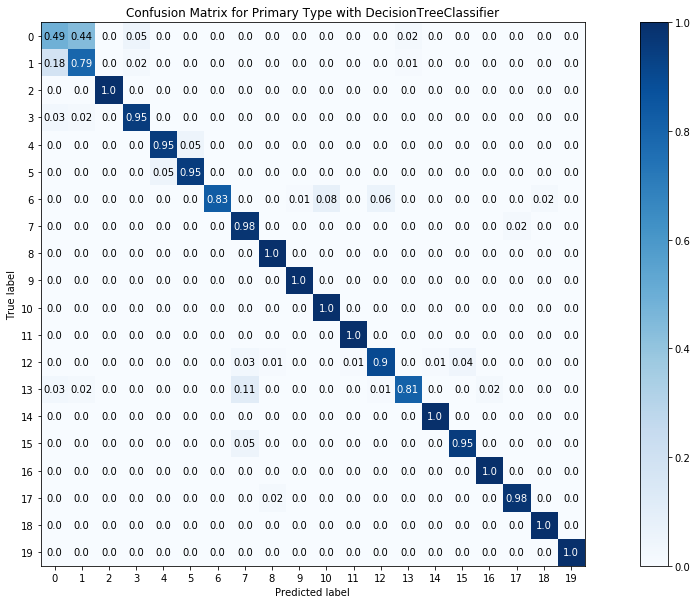

In [71]:
evaluate_features(df_for_model, labels)

## ExtraTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.7s finished


Log loss: 16.81633220018102
Accuracy: 0.5131043980985344
              precision    recall  f1-score   support

           0       0.41      0.34      0.37    258379
           1       0.69      0.49      0.57    771368
           2       0.62      0.45      0.52    261587
           3       0.08      0.41      0.14     15985
           4       0.76      0.51      0.61    495096
           5       0.44      0.44      0.44    122150
           6       0.25      0.50      0.33    159619
           7       0.08      0.36      0.13      9853
           8       0.05      0.49      0.10     11147
           9       0.51      0.42      0.46    194826
          10       0.87      0.45      0.60    465891
          11       0.15      0.53      0.23     28148
          12       0.53      0.55      0.54    260467
          13       0.06      0.32      0.10     29061
          14       0.08      0.78      0.15     40599
          15       0.30      0.26      0.28     34836
          16       0.62 

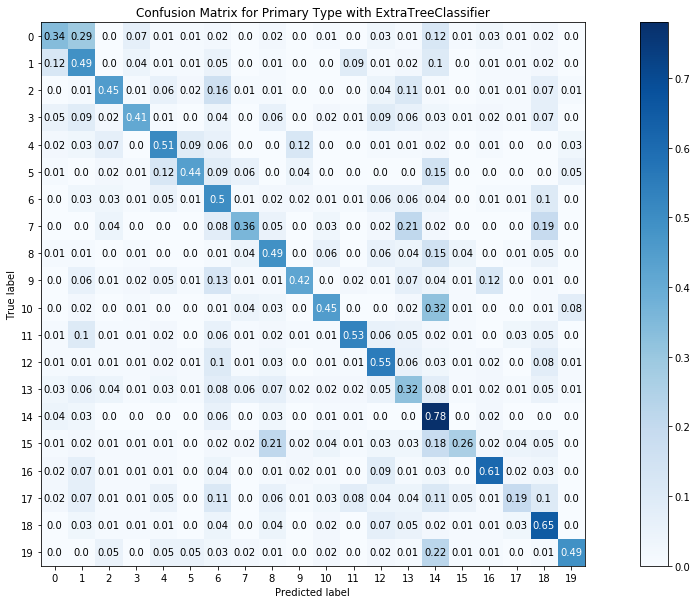

In [72]:
evaluate_features(df_for_model, labels, 1)

## RandomForestClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


Log loss: 2.058237934706778
Accuracy: 0.6984764689420734
              precision    recall  f1-score   support

           0       0.46      0.38      0.42    258379
           1       0.80      0.66      0.72    771368
           2       0.95      0.85      0.90    261587
           3       0.09      0.32      0.14     15985
           4       0.93      0.93      0.93    495096
           5       0.90      0.92      0.91    122150
           6       0.32      0.60      0.42    159619
           7       0.23      0.51      0.32      9853
           8       0.02      0.60      0.04     11147
           9       0.96      0.82      0.88    194826
          10       0.92      0.49      0.64    465891
          11       0.18      0.38      0.24     28148
          12       0.71      0.54      0.61    260467
          13       0.16      0.24      0.19     29061
          14       0.16      0.69      0.26     40599
          15       0.26      0.16      0.20     34836
          16       0.92 

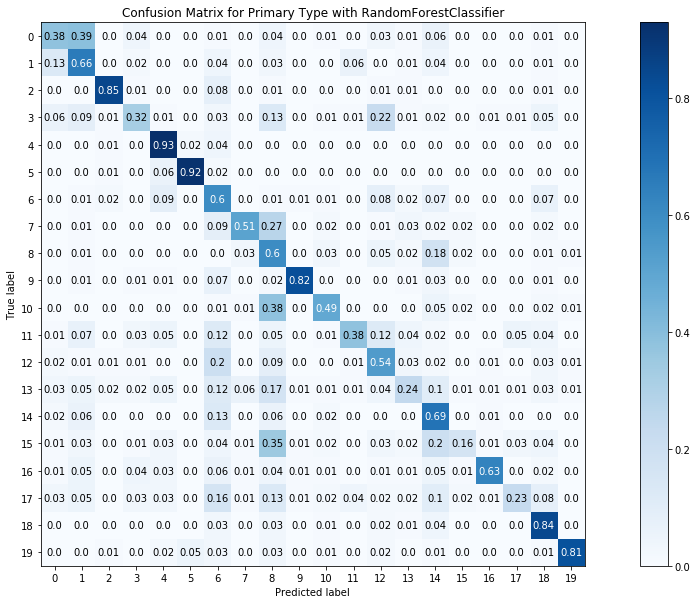

In [73]:
evaluate_features(df_for_model,labels,2)

## KNeighborsClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


Log loss: 3.754329695614992
Accuracy: 0.7323464418651884
              precision    recall  f1-score   support

           0       0.38      0.44      0.41    258379
           1       0.71      0.80      0.75    771368
           2       0.61      0.76      0.68    261587
           3       0.51      0.25      0.34     15985
           4       0.73      0.89      0.80    495096
           5       0.58      0.37      0.45    122150
           6       0.59      0.40      0.48    159619
           7       0.50      0.41      0.45      9853
           8       0.41      0.16      0.23     11147
           9       0.78      0.79      0.78    194826
          10       0.93      0.91      0.92    465891
          11       0.60      0.27      0.37     28148
          12       0.73      0.59      0.65    260467
          13       0.37      0.05      0.09     29061
          14       0.60      0.56      0.58     40599
          15       0.53      0.35      0.42     34836
          16       0.68 

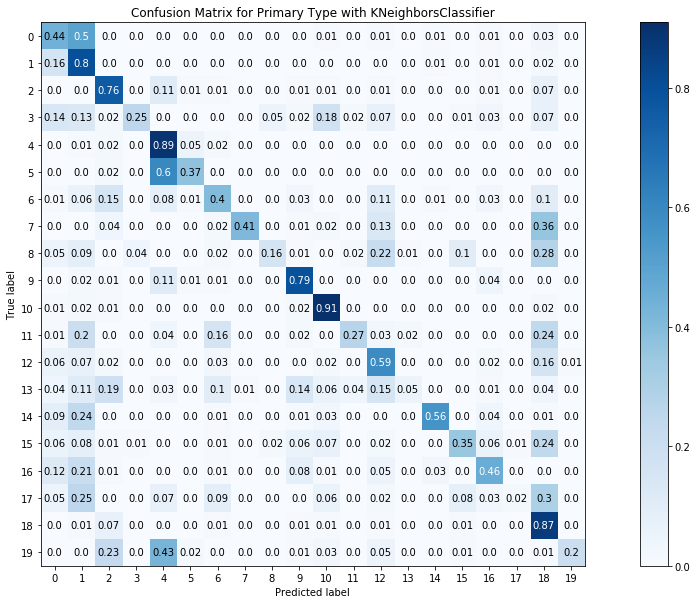

In [74]:
evaluate_features(df_for_model,labels,3)

## GaussianNB:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.8s finished


Log loss: 2.985001366396225
Accuracy: 0.29381321722625253


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    258379
           1       0.63      0.35      0.45    771368
           2       0.28      0.18      0.22    261587
           3       0.01      0.00      0.00     15985
           4       0.24      0.31      0.27    495096
           5       0.36      0.60      0.45    122150
           6       0.13      0.20      0.16    159619
           7       0.20      0.40      0.27      9853
           8       0.01      0.48      0.02     11147
           9       0.17      0.36      0.23    194826
          10       0.66      0.46      0.54    465891
          11       0.03      0.07      0.04     28148
          12       0.44      0.00      0.01    260467
          13       0.00      0.00      0.00     29061
          14       0.12      0.47      0.19     40599
          15       0.00      0.00      0.00     34836
          16       0.00      0.00      0.00    164082
          17       0.00    

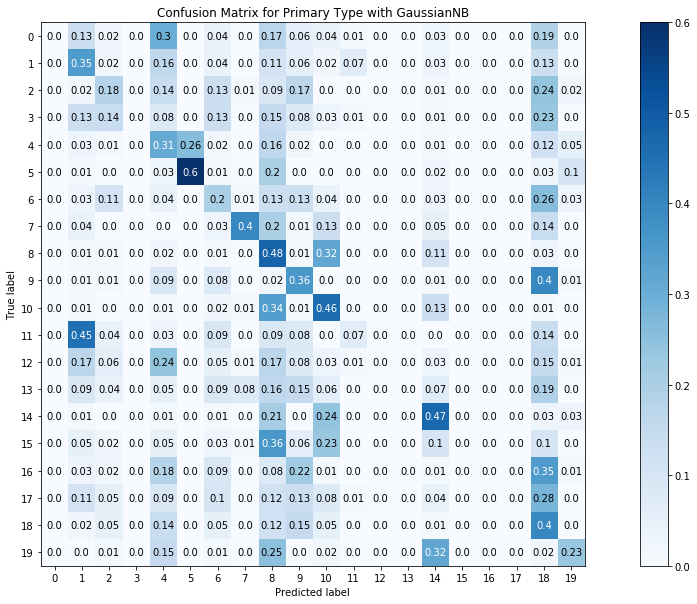

In [75]:
evaluate_features(df_for_model,labels,4)